# Understanding and Implementing Linear Regression | From Scratch

Every regression story starts with a dataset. The first thing a data scientist looks into after his `pd.read_csv()` is what all columns are present with the `df.columns`. After endless matplotlib and seaborn he thinks of the regression problem that the corporate asked him to solve. Needless to say the smart enthusiast kicks out some columns and rows, makes adjustments to some and then proceeds to `from sklearn.linear_model import LinearRegression` or `from sklearn.svm import SVR` or maybe even the `import xgboost as xg`.

Oh yes! choosing the right algorithm has always been trying to find the one that meets your need and comes up with the best score say RMSE or R2. But do you actually understand what's going on in the backend? 

Let's dive deep into understanding what's going on.

## Simple Linear Regression

The shopkeeper tells you that a kilogram of apple is 120₹, and this information is sufficient for you to calculate the price for 2.5kg. Or even when there's a sale, when it's just 220₹ for 2kg you are able to clearly understand what the price would be for your requirement and this is because you know that the price linearly increases with the quantity. We make an assumption that the problem we have also follows a similar trend where we can plot a line to describe how one thing is dependent on the other.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


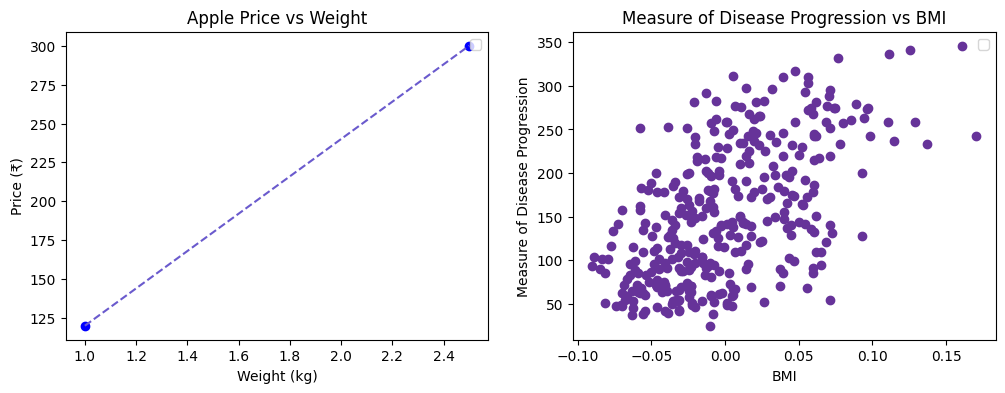

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Data for the price of apples (in Rs) as a function of weight (in kg)
weight_kg = [1, 2.5]  # Weight of apples in kg
price_rs = [120, 300]  # Price of apples in Rs

# Create a scatter plot
axs[0].scatter(weight_kg, price_rs, color='blue')
axs[0].plot(weight_kg, price_rs, color='slateblue', linestyle='--')
axs[0].set_xlabel('Weight (kg)')
axs[0].set_ylabel('Price (₹)')
axs[0].set_title('Apple Price vs Weight')
axs[0].legend()

# Plot for the second subplot
axs[1].scatter(X_train[:,2], y_train, color='rebeccapurple')
axs[1].set_xlabel('BMI')
axs[1].set_ylabel('Measure of Disease Progression')
axs[1].set_title('Measure of Disease Progression vs BMI')
axs[1].legend()

plt.show()

When looking into real data it becomes evident that they don't follow a trend where it's easy to calculate. But if we account for some error from a baseline we might be able to establish linear dependency to an extend. The above graph is a good example from the diabetes dataset of sklearn. For the apple price example a line to show the price vs weight relationship can be derived as. For any point (x,y) it follows the trend y=120x or let's say the price follows a linear line where you pay 120₹ for every kg you buy and the shopkeeper never asks you for just inquiring. If one were to generalize this then it would be a line like:
$$
y = \beta_0  x + \beta_1
$$

Where $β_0$ was 120 and $β_1$ was 0. And linear regression is where you construct such a line for any of your data. \
Suppose your data follows the model:
$$
\hat{y} = \hat{\beta_0}  x + \hat{\beta_1}
$$
where the hats represent the predicted values. We can say that the line has a good fit when the value of residual error $e$ (how far is the data point from the value suggested by your line).\
<p style="text-align: center;">
for, $e_i = y_i - \hat{y}_i $ <br>
and Residual Sum of Squares, (RSS) = $e_0^2+e_1^2+e_2^2+...+e_n^2$ <br>
$RSS = (y_0-\hat{y}_0)^2+(y_1-\hat{y}_1)^2+...+(y_n-\hat{y}_n)^2$ <br>
$RSS = Σ(y_i-(\hat{\beta_0}  x_i + \hat{\beta_1}))^2$ <br>
</p>
Now our job simply becomes to find the best βs that keeps the RSS as low as possible. Now, to achieve this we could go with the OLS (Ordinary Least Squares) or Gradient Descent. Since the LinearRegression model from sklearn follows OLS, this article will be demonstrating on how that works. Upon differentiating (mathematics that say, how much does the dependent quantity [here RSS] change when the independent quantity is negligibly changed [here βs]) residual error(RSS) with the coefficients (β0 and β1) and equating to zero we find the points where RSS is minimum.

<p style="text-align: center;">
$\frac{\partial{RSS}}{\partial{β_0}} = -2 (Σ(y_i-\hat{\beta_0}-\hat{\beta_1})) = 0$ <br>
$\hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x}$ <br>
$\frac{\partial{RSS}}{\partial{β_1}} = -2 \Sigma (y_i-\bar{y}+\beta_1(x_i-\bar{x}))(x_i-{\bar{x}}) = 0$ <br>
$\hat{\beta_1} = \Sigma \frac{(y_i-\bar{y})(x_i-\bar{x})}{(x_i-\bar{x})}$ <br>
</p>

The above equations help us to find β0 and β1, and this holds true when we have only one feature (say BMI) trying to predict the progression on diabetes.

But after exploring the data in hand we realise that there are other features or parameters that influence our target. And to accommodate all those features let's put all our values in a matrix (data points or values arranged as rows and columns)

## Multiple Linear Regression


In [4]:
data = load_diabetes(as_frame=True)
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


For a data that looks like this we have several features that define the progression on diabetes. And to accommodate all this data we transform it to a matrix where each value is represented as X(i,j) where i says which row and j says which column. And it would look like this:

<p style="text-align: center;">
$\begin{bmatrix} y_{0} \\ y_{1} \\ .. \\ y_{m} \end{bmatrix}$ = 
$\begin{bmatrix} 1 & X_{00} & X_{01} & .. & X_{0n} \\ 1 & X_{10} & X_{11} & .. & X_{1n} \\ 1 & .. & .. & .. & .. \\ 1 & X_{m0} & X_{m1} & .. & X_{mn} \end{bmatrix}$  $\begin{bmatrix} \beta_{0} \\ \beta_{1} \\ .. \\ \beta_{n} \end{bmatrix}$ <br>
</p>
$$
Y = X\beta
$$

Where Y is our target, X is the matrix or DataFrame of our data arranged in a manner where each column represents a particular feature and each row in the data is for the corresponding target y and the third matrix is the matrix of our intercept (β0) and weights (slope β1…βn). Now just as we did for the single linear regression, let's calculate the residual errors.

<p style="text-align: center;">
$e = y - \hat{y}$ <br>
$RSE = (y - \hat{y})^T y - \hat{y}$ <br>
$RSE = (y^T - (X\beta)^T)(y - \hat{y})$ <br>
$RSE = y^Ty - 2y^TX\beta + \beta^TX^TX\beta$ <br>
</p>

The above calculations are a bit fussy and different because we're dealing with matrices and <a href="https://www.youtube.com/watch?v=NU37mF5q8VE&t=2456s">this video</a> can help you understand it better. And after differentiating with β we get

<p style="text-align: center;">
$\frac{dE}{d\beta} = -2y^TX + \frac{d(\beta^TX^TX\beta)}{d\beta} = 0$ <br>
$\beta = (X^TX)^{-1}X^TY$ <br>
</p>

The final equation gives us the β matrix. But there are few issues here,

The time complexity of a matrix inverse operation is O(n^3) and which means if our X^T * X matrix has 3000 values for instance 300 examples which have 10 features, then it would take 27,000,000,000 iterations to compute the value and also do note that if the determinant of a matrix is zero then it's inverse just won't exist.

With all the theory just said let's dive into implementation in python.

## Code

To compute our linear regression let's construct a class that has all the attributes and methods we'd be needing.

In [6]:
import numpy as np

class MultipleLinearRegression:
    def __init__(self):
        """
        Initialize a MultipleLinearRegression object.
        """
        self.coeff_ = None # beta 1 to beta n values
        self.intercept_ = None # beta 0 value

    def fit(self, X, y):
        """
        Fit the linear regression model.

        Parameters:
        X (numpy.ndarray): The input feature matrix with shape (n_samples, n_features).
        y (numpy.ndarray): The target values with shape (n_samples,).

        Computes and sets the coefficients (betas) and intercept for the linear regression model.
        """
        X = np.insert(X, 0, 1, axis=1)
        
        betas = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y) # follows the equation as above
        self.intercept_ = betas[0]
        self.coeff_ = betas[1:]

    def predict(self, X):
        """
        Make predictions using the linear regression model.

        Parameters:
        X (numpy.ndarray): The input feature matrix for which predictions are to be made with shape (n_samples, n_features).

        Returns:
        numpy.ndarray: Predicted target values with shape (n_samples,).
        """
        y_pred = np.dot(X, self.coeff_) + self.intercept_
        return y_pred

Here our class has three methods of which one is a constructor that sets the values to None, the fit method finds the values of slopes and intercept and the predict method gives predition for a test data.
Now to test our code, let's pull a dataset to work with

In [8]:
# Code as above
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

And with these data let us execute the fit method of our class

In [9]:
mlr = MultipleLinearRegression()
mlr.fit(X_train, y_train)
mlr.coeff_, mlr.intercept_

(array([  28.58297885, -260.7460662 ,  494.21420338,  294.55710928,
        -911.28612744,  601.93675888,   64.93690777,  140.09313478,
         813.06920641,   76.14511679]),
 151.34554771656755)

In [8]:

mlr.coeff_

array([  28.58297885, -260.7460662 ,  494.21420338,  294.55710928,
       -911.28612744,  601.93675888,   64.93690777,  140.09313478,
        813.06920641,   76.14511679])

In [11]:
y_pred = mlr.predict(X_test)
y_pred.shape

(89,)

Now to check how well did our model do, lets use the LinearRegression class from sklearn and compare with its rmse and r2 scores

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Multiple Linear Regression")
print(f"Mean Squared Error: {mse}")
print(f"r2 score: {r2}")

Multiple Linear Regression
Mean Squared Error: 3187.8063090721257
r2 score: 0.4800233155139705


In [13]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Linear Regression from sklearn")
print(f"Mean Squared Error: {mse}")
print(f"r2 score: {r2}")

Linear Regression from sklearn
Mean Squared Error: 3187.806309072129
r2 score: 0.48002331551396993


This confirms that our code is working right and it is implemented properly. As discussed above there are issues with the OLS approach and thus a better method would be conducting gradient descent.

In [ ]:
<h1>Thank You for Reading Through.<> 
This article is a part of AI FROM SCRATCH series. Read More! Learn More!